C03 - Ascending to the 3D World
===============================

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from draw3d import *
from draw2d import *
from vectors import length, to_polar
from math import sin, cos, pi, acos
import itertools

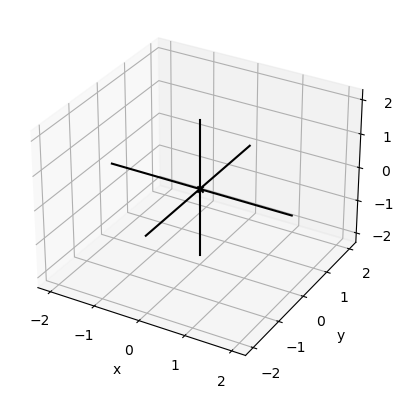

In [3]:
draw3d()

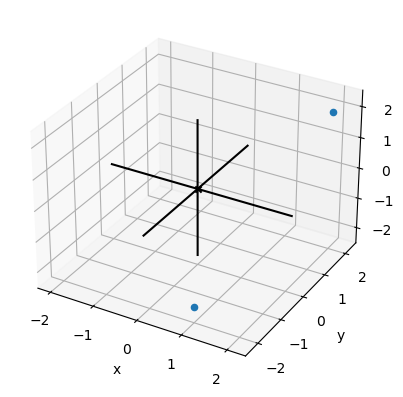

In [4]:
# 3.1.2 3D drawing with Python

draw3d(
    Points3D((2,2,2), (1,-2,-2), color=blue)
)



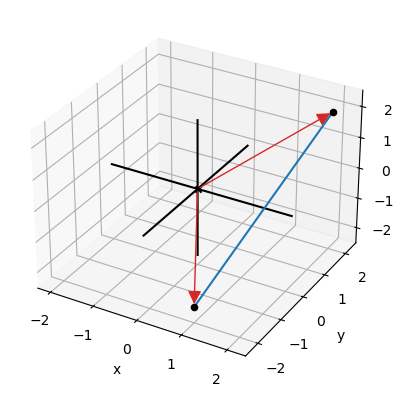

In [5]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

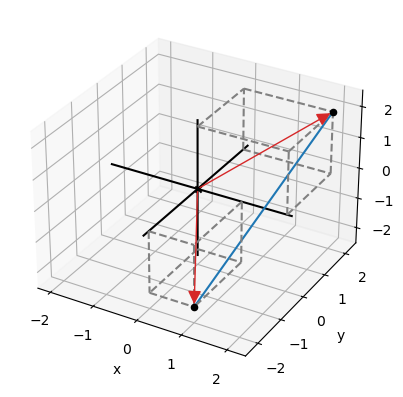

In [6]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)


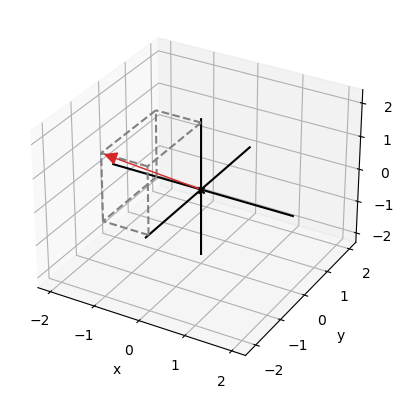

In [7]:
# Exercise 3.1
p = (-1,-2,2)
draw3d(
    Arrow3D(p),
    Box3D(*p)
)

((-1, 1, 1), (1, 1, 1))
((-1, 1, -1), (1, 1, -1))
((-1, -1, 1), (1, -1, 1))
((-1, -1, -1), (1, -1, -1))
((1, -1, 1), (1, 1, 1))
((1, -1, -1), (1, 1, -1))
((-1, -1, 1), (-1, 1, 1))
((-1, -1, -1), (-1, 1, -1))
((1, 1, -1), (1, 1, 1))
((1, -1, -1), (1, -1, 1))
((-1, 1, -1), (-1, 1, 1))
((-1, -1, -1), (-1, -1, 1))


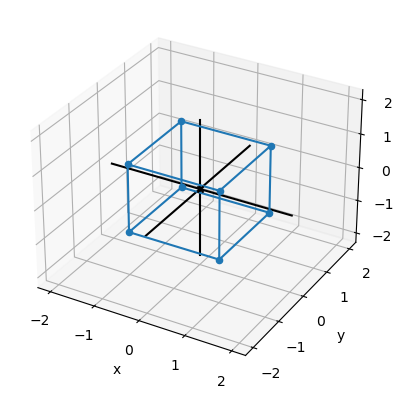

In [8]:
# Exercise 3.2
pm1 = [1, -1]

vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1,y,z), (1,y,z)) for y in pm1 for z in pm1] + \
        [((x,-1,z), (x,1,z)) for x in pm1 for z in pm1] + \
        [((x,y,-1), (x,y,1)) for x in pm1 for y in pm1]

for edge in edges:
    print(edge)

draw3d(
    Points3D(*vertices, color=blue),    
    *[Segment3D(*edge) for edge in edges]
)
        

### 3.2 Vector arithmetic in 3D

v=(2, 1, 1)
v=(1, 2, 2)
v=(3, 3, 3)


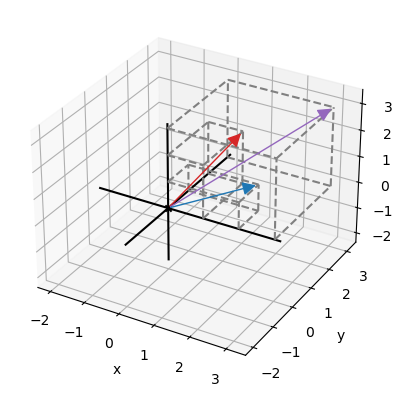

In [9]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

a = (2,1,1)
b = (1,2,2)
c = add(a, b)

for v in [a,b,c]:
    print(f"{v=}")

draw3d(
    Arrow3D(a, color=blue),
    Box3D(*a),
    Arrow3D(b, color=red),
    Box3D(*b),
    Arrow3D(c, color=purple),
    Box3D(*c)
)

v=(1, 1, 3)
v=(2, 4, -4)
v=(4, 2, -2)
v=(7, 7, -3)


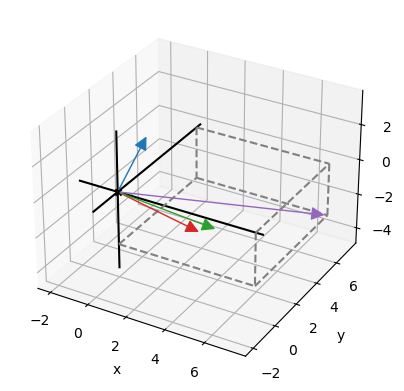

In [10]:
a = (1,1,3)
b = (2,4,-4)
c = (4,2,-2)
d = add(a,b,c)

for v in [a,b,c,d]:
    print(f"{v=}")

draw3d(
    Arrow3D(a, color=blue),
    # Box3D(*a),
    Arrow3D(b, color=red),
    # Box3D(*b),
    Arrow3D(c, color=green),
    # Box3D(*c),
    Arrow3D(d, color=purple),
    Box3D(*d)
)

i=(-1, -3, 3)
i=(3, 2, 4)
i=[-4, -5, -1]


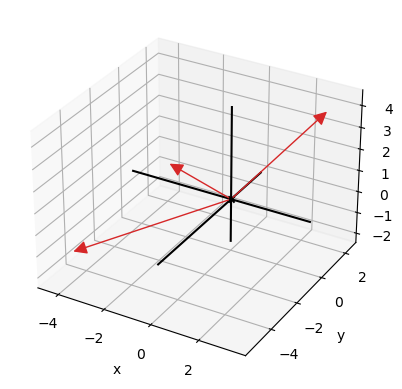

In [11]:
# Subtracting 3D vectors
from functools import reduce

v = (-1, -3, 3)
w = (3, 2, 4)

def subtract(*vectors):
    return [reduce(lambda a,b: a-b, coords) for coords in zip(*vectors)]

u = subtract(v, w)

for i in [v, w, u]:
    print(f"{i=}")

draw3d(
    *[Arrow3D(i) for i in [v,w,u]]
)

In [12]:
# 3.2.4 Computing lengths and distances
p = ((3,4, 12))
length(p)

13.0

In [13]:
# 3.2.5 Computing angles and directions
# - spherical coordiates

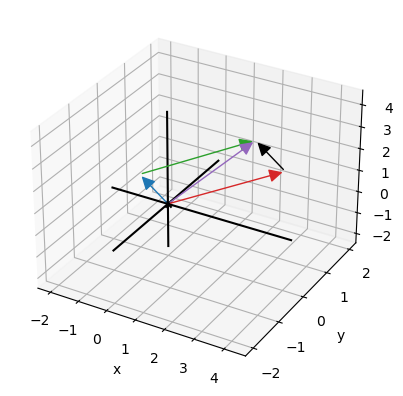

In [14]:
# Exercise 3.3

a = (4,0,3)
b = (-1,0,1)
c = add(a, b)

draw3d(
    Arrow3D(a, color=red),
    Arrow3D(b, color=blue),
    Arrow3D(c,b, color=green),
    Arrow3D(c,a, color=black),
    Arrow3D(c, color=purple)
    
)

In [15]:
# Exercise 3.4
vectors1 = [(1,2,3,4,5), (6,7,8,9,10)]
print(list(zip(*vectors1)))

vectors2 = [(1,2), (3,4), (5,6), (7,8)]
print(list(zip(*vectors2)))

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
[(1, 3, 5, 7), (2, 4, 6, 8)]


(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


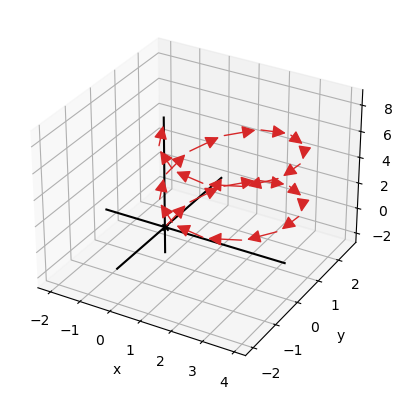

In [16]:
# Exercise 3.5
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0, 24)]
vs

running_sum = (0,0,0)
arrows=[]

for v in vs:
    next_sum = add(running_sum, v)
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum

print(running_sum)
draw3d(*arrows)

In [17]:
# Exercise 3.6
def scale(scalar, v):
    return tuple(scalar * coord for coord in v)

print(scale(3, (3,2,-2)))


(9, 6, -6)


i=(1, -1, -1)
i=(0, 0, 2)
i=(0.5, -0.5, 0.5)


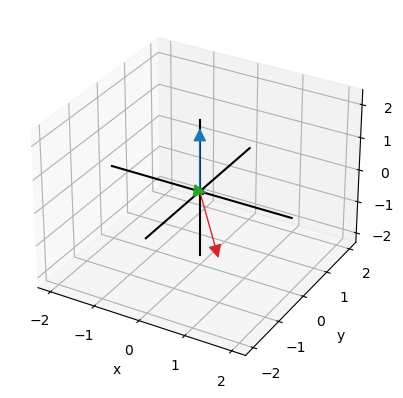

In [18]:
u = (1,-1,-1)
v = (0,0,2)

w = add(u, scale(0.5, subtract(v,u)))

for i in [u,v,w]:
    print(f"{i=}")

draw3d(
    Arrow3D(u, color=red),
    Arrow3D(v, color=blue),
    Arrow3D(w, color=green),
)

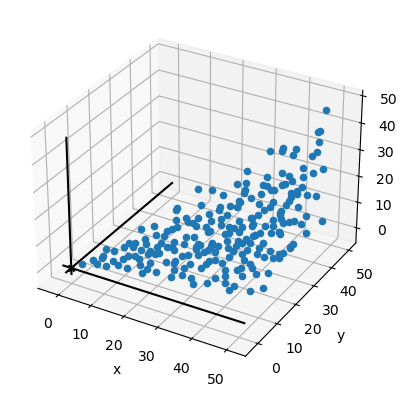

In [19]:
# Exercise 3.9

def vectors_with_int_number_length(max_coord=100):
    for x in range(1, max_coord):
        for y in range(1, x+1):
            for z in range(1, y+1):
                if length((x,y,z)).is_integer():
                          yield(x,y,z)
                          
draw3d(
    *[Points3D(v, color=blue) for v in vectors_with_int_number_length(50)]
)
                        

In [20]:
# 3.3.1 - Picturing the dot product
# - inner product

a=(1, 2, -1)
b=(3, 0, 3)
dot_prod=0


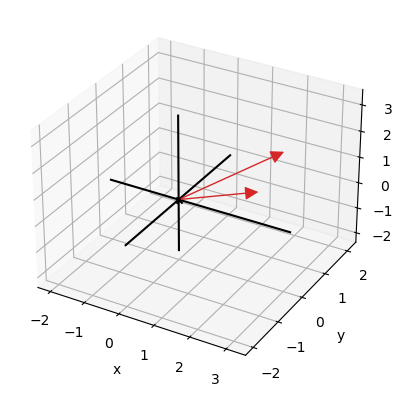

In [21]:
# 3.3.2 Computing the dot product
a = (1,2,-1)
b = (3,0,3)

dot_prod = sum([i * j for i, j in zip(a,b)])

print(f"{a=}")
print(f"{b=}")
print(f"{dot_prod=}")

draw3d(
    Arrow3D(a),
    Arrow3D(b)
)

In [22]:
def dot(v1, v2):
    return sum([i * j for i, j in zip(v1,v2)])

print(dot((1,3,3), (2,2,-4)))

-4


In [23]:
print(dot((1,0),(0,2)))
print(dot((0,3,0),(0,0,-5)))

0
0


In [24]:
a = (3,4)
b = (2,3)

print(dot(a,b))
print(dot(scale(2,a), b))
print(dot(a, scale(2,b)))

18
36
36


In [25]:
3 * 2 * cos(75 * pi / 180)

1.5529142706151244

In [26]:
def angle_between(v1, v2):
    
    return acos(dot(v1,v2) / (length(v1) * length(v2)))

print(angle_between(a,b) * 180 * pi)

31.38366534572786


In [27]:
from itertools import combinations

w = (-4,1)
v = (1,2)
u = (4,2)


for i, j in combinations(["u","v", "w"],2):
    print(f"{i} . {j} => {globals()[i]} . {globals()[j]} => {dot(globals()[i],globals()[j])}")

u . v => (4, 2) . (1, 2) => 8
u . w => (4, 2) . (-4, 1) => -14
v . w => (1, 2) . (-4, 1) => -2


In [28]:
# Exercise 3.12

u = (-4,1)
v = (1,2)



for i, j in combinations(["u","v"],2):
    print(f"{i} . {j} => {globals()[i]} . {globals()[j]} => {dot(globals()[i],globals()[j])}")

u . v => (-4, 1) . (1, 2) => -2


In [29]:
# Exercise 3.16
ud = 3.61
vd = 1.44
angle_deg = 101.3

dp = ud * vd * cos(angle_deg * pi / 180)
print(f"{dp=:0.4}")


dp=-1.019


In [30]:
# Exercise 3.17
r1, t1 = to_polar((4,3))
r2, t2 = to_polar((3,4))

print(f"{r1=} {t1=}")
print(f"{r2=} {t2=}")

print(f"{t2-t1=:0.3}")

r1=5.0 t1=0.6435011087932844
r2=5.0 t2=0.9272952180016122
t2-t1=0.284


In [31]:
# Exercise 3.18
a = (1,1,1)
b = (-1,-1,1)

print(f"{length(a)=}")

print(f"{angle_between(a,b) * 180 / pi=:0.4}")

length(a)=1.7320508075688772
angle_between(a,b) * 180 / pi=109.5


In [32]:
# 3.4.4 Computing the cross product of 3D vectors

def cross(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    
    return (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

a = (0, 1, 0)
b = (0, 0, -1)

cross(a, b)

(-1, 0, 0)

In [33]:
# Exercise 3.21
a = (0, 0, 3)
b = (0, -2, 0)

cross(a, b)


(6, 0, 0)

In [34]:
# Exercise 3.22 - Negative scalar multiples of one another
a = (1, -2, 1)
b = (-6, 12, -6)

cross(a, b)


(0, 0, 0)

In [35]:
# Exercise 3.24
a = (1, 0, 1)
b = (-1, 0, 0)

cross(a, b)

(0, -1, 0)

In [36]:
# Exercise 3.25
from random import randint
a = (0, 0, 1)
for i in range(0, 5):
    b = (randint(-20, 20),randint(-20, 20),randint(-20, 20))
    c = cross(a, b)
    print(f"{a=} x {b=} => {cross(a,b)=}")
    


a=(0, 0, 1) x b=(-15, 15, 3) => cross(a,b)=(-15, -15, 0)
a=(0, 0, 1) x b=(-4, -1, 0) => cross(a,b)=(1, -4, 0)
a=(0, 0, 1) x b=(20, 5, 8) => cross(a,b)=(-5, 20, 0)
a=(0, 0, 1) x b=(-1, 10, 5) => cross(a,b)=(-10, -1, 0)
a=(0, 0, 1) x b=(-3, -8, -17) => cross(a,b)=(8, -3, 0)


In [37]:
# Exercise 3.26
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

octahedron = [
    [vec_x, vec_y, vec_z]
    # Combinations of ±1 and zeros for the first vector (x-axis)
    for vec_x in [(x, 0, 0) for x in [-1, 1]]
    # Perpendicular unit y and z vectors
    for vec_y, vec_z in itertools.permutations([(0, y, z) for y, z in itertools.product([-1, 0, 1], repeat=2) 
                        if abs(y) + abs(z) == 1], 2)
    # Right-hand rule: cross product of y and z in x direction
    if (
        vec_y[1] * vec_z[2] - vec_y[2] * vec_z[1],
        vec_y[2] * vec_z[0] - vec_y[0] * vec_z[2],
        vec_y[0] * vec_z[1] - vec_y[1] * vec_z[0]
    ) == vec_x
]

print('octahedron:', *octahedron, sep='\n- ')
print()
print('vertices:', *vertices(octahedron), sep='\n- ')
print(f"{len(octahedron)=}")

octahedron:
- [(-1, 0, 0), (0, -1, 0), (0, 0, 1)]
- [(-1, 0, 0), (0, 0, -1), (0, -1, 0)]
- [(-1, 0, 0), (0, 0, 1), (0, 1, 0)]
- [(-1, 0, 0), (0, 1, 0), (0, 0, -1)]
- [(1, 0, 0), (0, -1, 0), (0, 0, -1)]
- [(1, 0, 0), (0, 0, -1), (0, 1, 0)]
- [(1, 0, 0), (0, 0, 1), (0, -1, 0)]
- [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

vertices:
- (0, 1, 0)
- (0, -1, 0)
- (1, 0, 0)
- (-1, 0, 0)
- (0, 0, -1)
- (0, 0, 1)
len(octahedron)=8


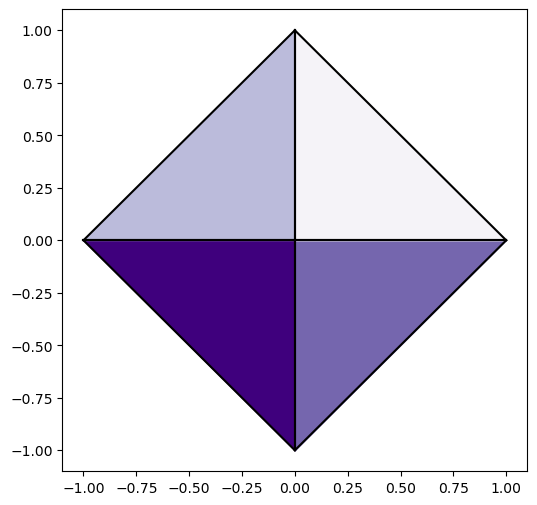

In [38]:
def component(v, direction):
    return (dot(v,direction) / length(direction))

def vector_to_2d(v):
    return component(v, (1,0,0)), component(v, (0,1,0))

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

blues = matplotlib.cm.get_cmap('Purples')

def unit(v):
    return scale(1./length(v), v)

def normal(face):    
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        # print(f"{face=}")
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons, axes=False, origin=False, grid=None)
    
render(octahedron, color_map=blues, lines=black)

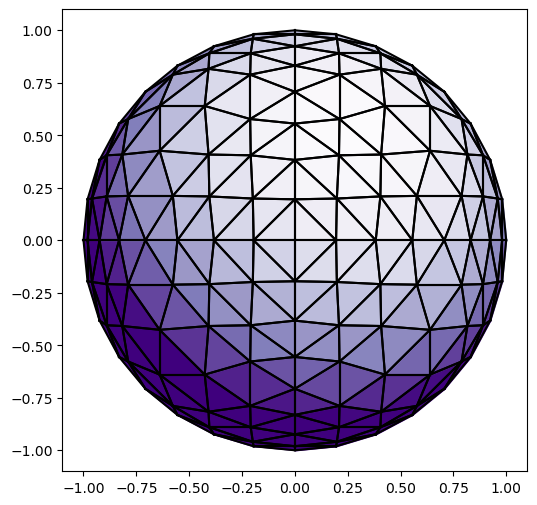

In [39]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

render(sphere_approx(3), lines='k')

ends_z=[(0, 0, 1), (0, 0, -1)]
plane_xy=[(-1, 0, 0), (0, -1, 0), (0, 1, 0), (1, 0, 0)]


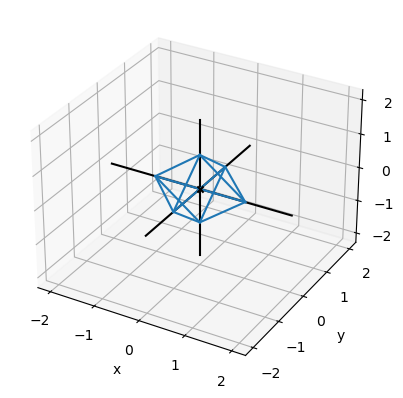

In [46]:
ends_z = [(0,0,z) for z in [1,-1]]
plane_xy = [(x, y, 0) for x, y in itertools.product([-1, 0, 1], repeat=2) if abs(x) + abs(y) == 1]

print(f"{ends_z=}")
print(f"{plane_xy=}")

octahedron_edges = (
    [Segment3D(v1, v2) for v1 in ends_z for v2 in plane_xy] + \
    [Segment3D(plane_xy[v], plane_xy[(v+1)%4]) for v in range(0,4)]
    
)

draw3d(
    *octahedron_edges
)

In [40]:
# # Generate all combinations of ±1 and zeros for the first vector (x-axis)
# x_vectors = [(x, 0, 0) for x in [-1, 1]]

# # Generate all possible combinations for y and z vectors (perpendicular unit vectors)
# perpendicular_vectors = [(0, y, z) for y, z in itertools.product([-1, 0, 1], repeat=2) 
#                         if abs(y) + abs(z) == 1]
# print(f"{x_vectors=}")
# print(f"{perpendicular_vectors=}")

# # Generate all valid face orientations
# octahedron = [
#     [x_vec, vec_y, vec_z]
#     for x_vec in x_vectors
#     for vec_y, vec_z in itertools.permutations(perpendicular_vectors, 2)
#     # Ensure right-hand rule: cross product of y and z should point in x direction
#     if (
#         vec_y[1] * vec_z[2] - vec_y[2] * vec_z[1],        
#         vec_y[2] * vec_z[0] - vec_y[0] * vec_z[2],
#         vec_y[0] * vec_z[1] - vec_y[1] * vec_z[0]
#     ) == x_vec
# ]


# # octahedron = list(itertools.product(x_vectors, perpendicular_vectors))

# print(f"{octahedron=}")
# print(f"{len(octahedron)=}")

# for face in octahedron:
#     print(f"{face=}")
#     print(f"{face[1]=} x {face[0]=} => {cross(face[1], face[0])=}")
#     print(f"{face[2]=} x {face[1]=} => {cross(face[2], face[1])=}")
#     print(f"{face[0]=} x {face[2]=} => {cross(face[0], face[2])=}")